## SIMPLE_RNN AND LSTM 

In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(7)

# Load the IMDB dataset, keeping only the top 5000 words
top_words = 5000
max_review_length = 500
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# Pad sequences to ensure uniform input length
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)


In [5]:
# Basic information
num_train_samples = X_train.shape[0]
num_test_samples = X_test.shape[0]
num_unique_words = len(set(word for review in X_train for word in review))

print(f"Number of training samples: {num_train_samples}")
print(f"Number of testing samples: {num_test_samples}")
print(f"Number of unique words: {num_unique_words}")

Number of training samples: 25000
Number of testing samples: 25000
Number of unique words: 4999


In [6]:
# Function to decode reviews back to words
word_index = imdb.get_word_index()
index_word = {v: k for k, v in word_index.items()}

def decode_review(review):
    return ' '.join([index_word.get(i - 3, '?') for i in review if i > 3])

# Display the first 5 reviews and their labels
for i in range(5):
    print(f"Review {i + 1}: {decode_review(X_train[i])}")
    print(f"Label {i + 1}: {'Positive' if y_train[i] == 1 else 'Negative'}\n")


Review 1: this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert is an amazing actor and now the same being director father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for and would recommend it to everyone to watch and the fly was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also to the two little that played the of norman and paul they were just brilliant children are often left out of the list i think because the stars that play them all grown up are such a big for the whole film but these children are amazing and should be for what they have done don't you think the whole story was so lovely b

c:\Users\abini\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


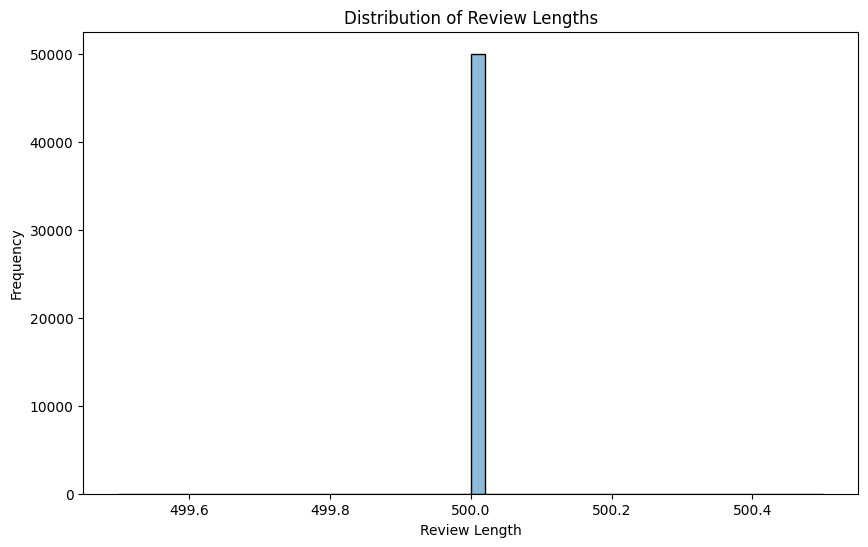

In [2]:
# Combine train and test sets
all_data = np.concatenate((X_train, X_test), axis=0)

# Calculate review lengths
review_lengths = [len(review) for review in all_data]

# Plot distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(review_lengths, bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


1641221/1641221 [==============================] - 2s 1us/step


c:\Users\abini\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


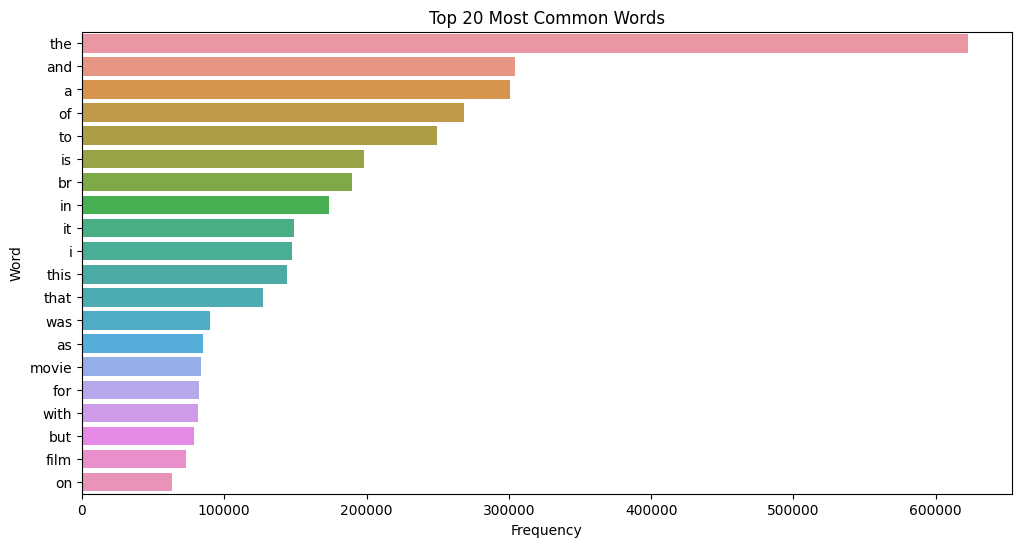

In [3]:
from collections import Counter

# Decode reviews back to words
word_index = imdb.get_word_index()
index_word = {v: k for k, v in word_index.items()}

# Flatten the list of reviews into a single list of words
all_words = [index_word.get(i - 3, '?') for review in all_data for i in review if i > 3]

# Calculate word frequencies
word_freq = Counter(all_words)

# Get the 20 most common words
common_words = word_freq.most_common(20)

# Plot the frequency of the 20 most common words
words, counts = zip(*common_words)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


c:\Users\abini\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


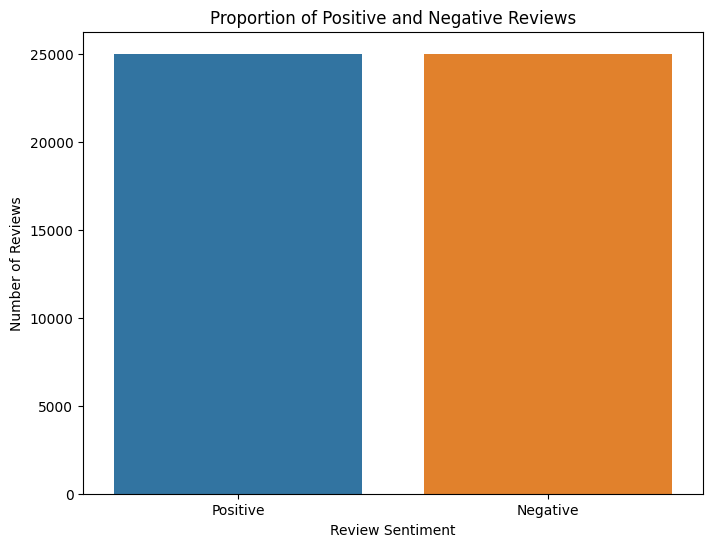

In [4]:
# Combine train and test labels
all_labels = np.concatenate((y_train, y_test), axis=0)

# Calculate the number of positive and negative reviews
num_positive = np.sum(all_labels)
num_negative = len(all_labels) - num_positive

# Plot the proportion of positive and negative reviews
plt.figure(figsize=(8, 6))
sns.barplot(x=['Positive', 'Negative'], y=[num_positive, num_negative])
plt.title('Proportion of Positive and Negative Reviews')
plt.xlabel('Review Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


## BUILDING SIMPLE RNN ARCHITECHTURE

In [4]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

# Create the RNN model
model_rnn = Sequential()
model_rnn.add(Embedding(top_words, 32, input_length=max_review_length))
model_rnn.add(SimpleRNN(100))
model_rnn.add(Dense(1, activation='sigmoid'))

# Compile the model
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_rnn.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               13300     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 173,401
Trainable params: 173,401
Non-trainable params: 0
_________________________________________________________________
None


## BUILDING LSTM ARCHITECTURE

In [5]:
from keras.layers import LSTM

# Create the LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(top_words, 32, input_length=max_review_length))
model_lstm.add(LSTM(100))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_lstm.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           160000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
# Train the Simple RNN model
model_rnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

# Train the LSTM model
model_lstm.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)


Epoch 1/3
391/391 [==============================] - 139s 351ms/step - loss: 0.6289 - accuracy: 0.6440 - val_loss: 0.5148 - val_accuracy: 0.7618
Epoch 2/3
391/391 [==============================] - 130s 332ms/step - loss: 0.4507 - accuracy: 0.7925 - val_loss: 0.4019 - val_accuracy: 0.8285
Epoch 3/3
391/391 [==============================] - 137s 350ms/step - loss: 0.6554 - accuracy: 0.6903 - val_loss: 0.6479 - val_accuracy: 0.6298
Epoch 1/3
391/391 [==============================] - 634s 2s/step - loss: 0.4857 - accuracy: 0.7634 - val_loss: 0.3609 - val_accuracy: 0.8453
Epoch 2/3
391/391 [==============================] - 597s 2s/step - loss: 0.3197 - accuracy: 0.8725 - val_loss: 0.3143 - val_accuracy: 0.8701
Epoch 3/3
391/391 [==============================] - 792s 2s/step - loss: 0.3120 - accuracy: 0.8689 - val_loss: 0.3276 - val_accuracy: 0.8676


In [7]:
# Evaluate the Simple RNN model
scores_rnn = model_rnn.evaluate(X_test, y_test, verbose=0)
print(f"Simple RNN Accuracy: {scores_rnn[1]*100:.2f}%")

# Evaluate the LSTM model
scores_lstm = model_lstm.evaluate(X_test, y_test, verbose=0)
print(f"LSTM Accuracy: {scores_lstm[1]*100:.2f}%")


Simple RNN Accuracy: 62.98%
LSTM Accuracy: 86.76%
